# 주제 :
# 목적 :
# 제출처 :

# 제목



In [2]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; }</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))


In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 분석 과정 

- 모듈 임포트 
- 데이타 수집 (학습데이타)
- 데이터 탐색
- 데이타 전처리 
- 데이터 학습 (모델화)
- 데이터 예측 (테스트데이타)
- 데이터 테스트 (정답률)
- + 시각화 화면 제시 

In [4]:
# 학습기 모듈 
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
# 학습데이터와 데스트 전용 데이터로 분할하는 메서드 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터수집
#### 클로링 방법을 이용하여 수집 함
#### py 로 작성하여도 됨.

In [10]:
# sklearn에서 제공하는 와인데이타셋 
from sklearn.datasets import load_wine
wine = load_wine()
# 데이타셋 설명 출력 
print(wine.DESCR)
#알콜(Alcohol) 말산(Malic acid) 회분(Ash) 회분의 알칼리도(Alcalinity of ash) 
#마그네슘(Magnesium) 총 폴리페놀(Total phenols) 플라보노이드 폴리페놀(Flavanoids) 
#비 플라보노이드 폴리페놀(Nonflavanoid phenols) 프로안토시아닌(Proanthocyanins) 
#색상의 강도(Color intensity) 색상(Hue) 희석 와인의 OD280/OD315 비율 (OD280/OD315 of diluted wines) 
#프롤린(Proline)


Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [11]:
type(wine)
len(wine)
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

# 데이타 전처리 

In [12]:
# 데이타프레임 생성
wine_data = pd.DataFrame(wine.data, 
                         columns=wine.feature_names)

# class 컬럼 생성
sy = pd.Series(wine.target, dtype="category")
sy = sy.cat.rename_categories(wine.target_names)
wine_data['class'] = sy
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [13]:
wine_data.shape

(178, 14)

In [14]:
wine_data['class'].unique()

['class_0', 'class_1', 'class_2']
Categories (3, object): ['class_0', 'class_1', 'class_2']

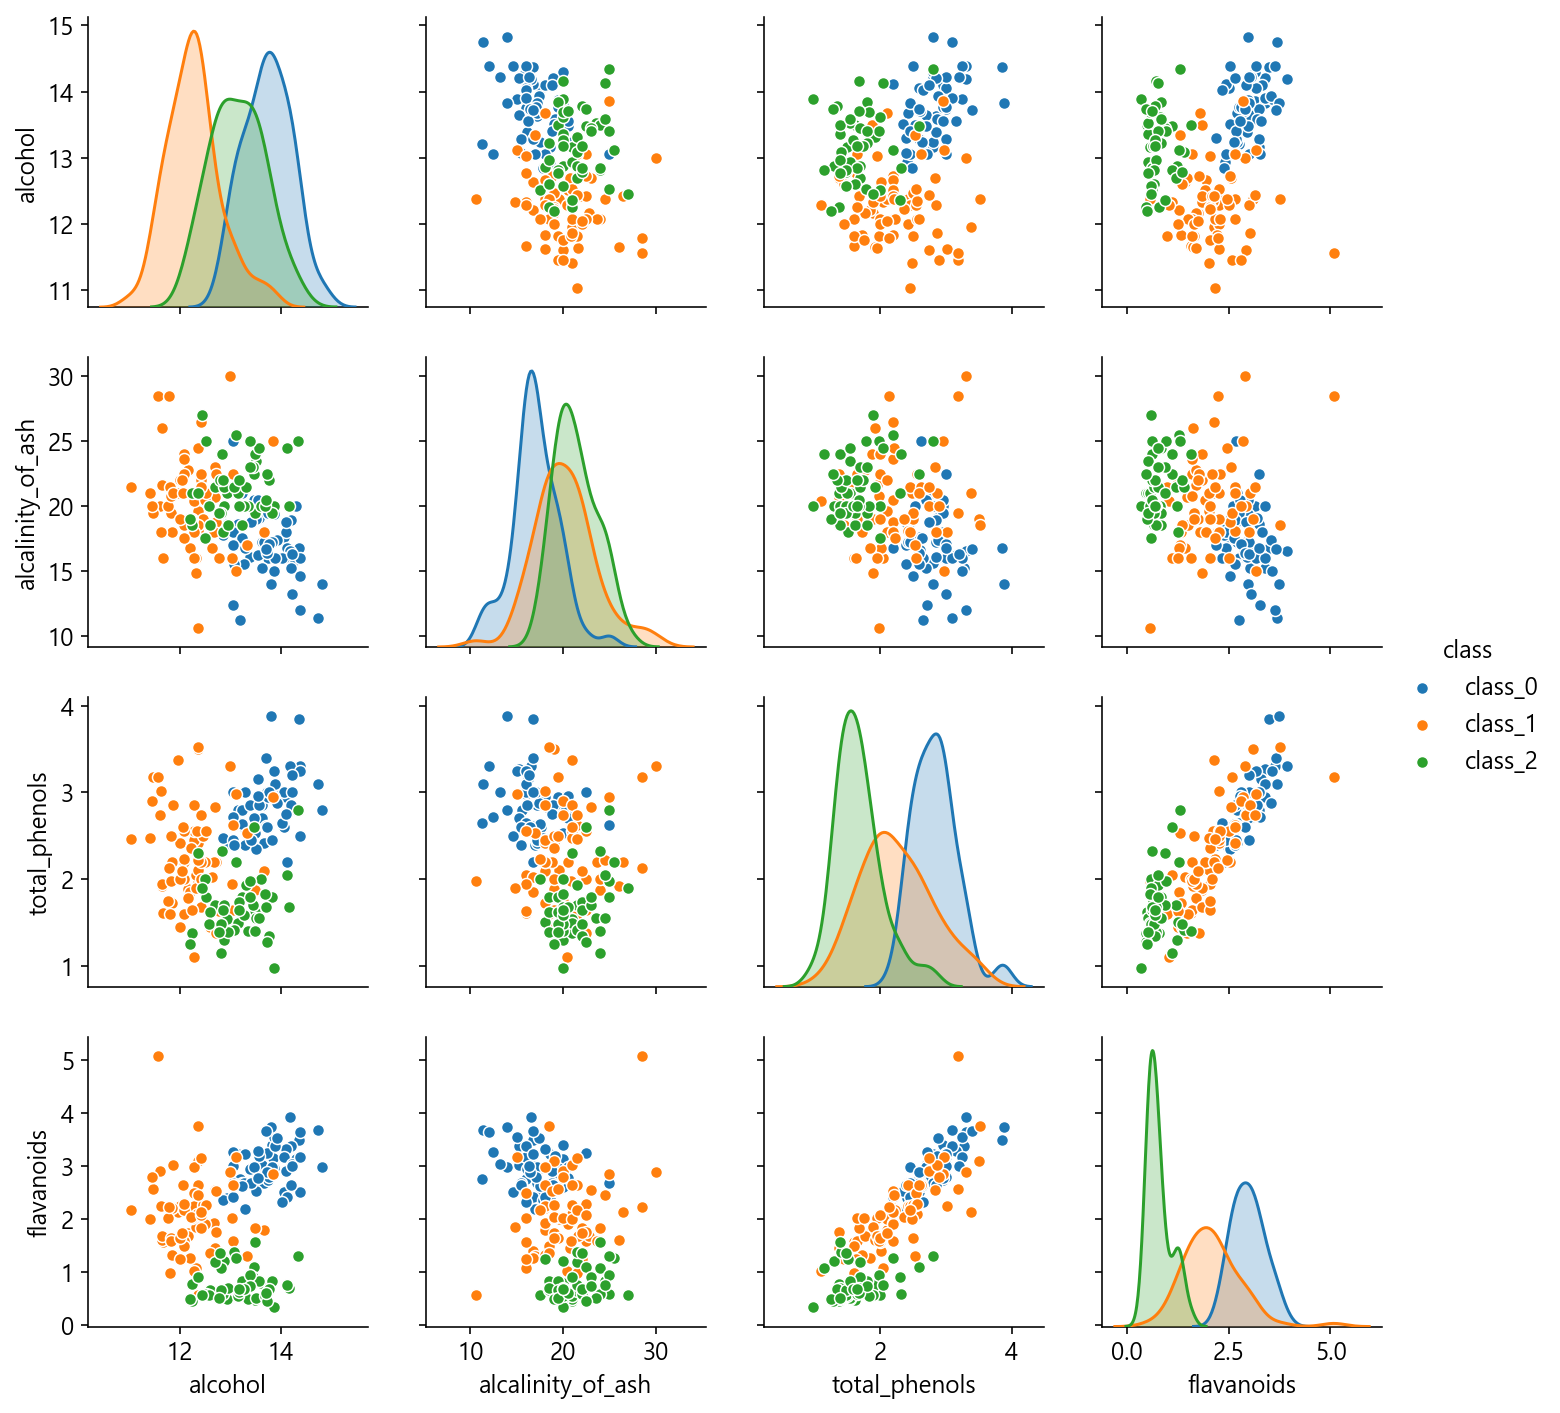

In [15]:
sns.pairplot(vars=["alcohol", "alcalinity_of_ash", \
                 "total_phenols", "flavanoids"], \
             hue="class", data=wine_data)
plt.show()

### 학습 전용과 테스트 전용 분리하기 

- 학습데이터와 데스트 전용 데이터로 분할하는 메서드 
- 임포트 
    - from sklearn.model_selection import train_test_split

```
    train_test_split( data, label, 
                       test_size=float, train_size=float, 
                        shuffle=True/False)
```                    

In [16]:
# data = wine_data.iloc[:, :13]
data = wine_data[["alcohol", "alcalinity_of_ash", \
                       "total_phenols", "flavanoids"]]
label = wine_data['class']

In [17]:
# 학습데이타 
data.columns, len(data.columns)

(Index(['alcohol', 'alcalinity_of_ash', 'total_phenols', 'flavanoids'], dtype='object'),
 4)

In [19]:
# wine_data = 학습데이타 + 테스트데이타 

x_train, x_test, y_train, y_test \
    = train_test_split(data, label, test_size = 0.2, 
                       train_size = 0.8, 
                       shuffle = True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((142, 4), (36, 4), (142,), (36,))

In [20]:
x_train.head()

,alcohol,alcalinity_of_ash,total_phenols,flavanoids
4,13.24,21.0,2.80,2.69
65,12.37,18.1,2.42,2.65
48,14.10,18.8,2.75,2.92
167,12.82,19.5,1.48,0.66
118,12.77,16.0,1.63,1.25


### 데이타 학습  : 모델링

In [21]:
# 학습기 : 서포트 벡터 머신(support vector machine)
clf = SVC()
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 데이터 예측 

In [22]:
y_pred = clf.predict(x_test)
y_pred

array(['class_1', 'class_1', 'class_0', 'class_1', 'class_0', 'class_2',
       'class_1', 'class_1', 'class_0', 'class_1', 'class_2', 'class_1',
       'class_2', 'class_2', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_2', 'class_2', 'class_0', 'class_0', 'class_2',
       'class_1', 'class_1', 'class_0', 'class_1', 'class_1', 'class_0',
       'class_1', 'class_0', 'class_1', 'class_2', 'class_0', 'class_2'],
      dtype=object)

### 결과 확인 

metrics.accuracy_score(label, clf.predict(data))

In [27]:
# 정답률 
print(f'정답률은? \
          {round(accuracy_score(y_test, y_pred),2)*100} %')

정답률은?           100.0 %


In [24]:
print(x_train.iloc[21])
print('-'*20)
print(y_train[21])

alcohol              13.82
alcalinity_of_ash    14.00
total_phenols         3.88
flavanoids            3.74
Name: 52, dtype: float64
--------------------
class_0


In [25]:
clf.predict([[14.22, 16.30, 3.20, 3.00]])

array(['class_0'], dtype=object)

In [28]:
print(label, confidence)

NameError: name 'confidence' is not defined